## Gaussian Process Regression (GPR)
### Toy Problems Rozanoff 2025


Hyperparameters that can be tuned:
1) Kernel type (RBF, Matérn, etc.)
2) Length scale (controls smoothness)
3) Signal variance (amplitude)
4) Noise variance (measurement uncertainty)
5) Optimization method

### 1. Import Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from scipy import linalg
import sys
import sklearn

### 2. Gaussian Process Regression Fundamentals

**What is GPR?**

Gaussian Process Regression is a Bayesian approach to regression that:
- Models the distribution of functions rather than individual parameters
- Provides **uncertainty estimates** for predictions (not just point estimates)
- Uses a **kernel function** to define similarity between data points
- Is non-parametric: complexity grows with data size

**Key Properties:**
- Prediction: $\hat{y} = \mu(x)$ with uncertainty $\sigma(x)$
- Can capture nonlinear relationships
- Naturally handles noise in data
- Computationally expensive: $O(n^3)$ complexity

#### 2a. Generate data and implement GPR with RBF kernel

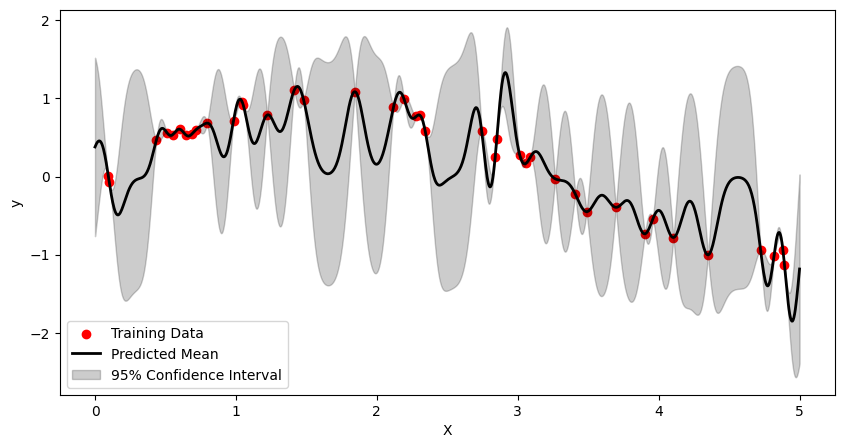

In [ ]:
# Generate sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to the data
y += 0.1 * np.random.randn(80)

# Define the kernel (RBF kernel)
kernel = 1.0 * RBF(length_scale=1.0)

# Create a Gaussian Process Regressor with the defined kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fit the Gaussian Process model to the training data
gp.fit(X_train, y_train)

# Make predictions on the test data
y_pred, sigma = gp.predict(X_test, return_std=True)

# Visualize the results
x = np.linspace(0, 5, 1000)[:, np.newaxis]
y_mean, y_cov = gp.predict(x, return_cov=True)

plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, c="r", label="Training Data")
plt.plot(x, y_mean, "k", lw=2, zorder=9, label="Predicted Mean")
plt.fill_between(
    x[:, 0],
    y_mean - 1.96 * np.sqrt(np.diag(y_cov)),
    y_mean + 1.96 * np.sqrt(np.diag(y_cov)),
    alpha=0.2,
    color="k",
    label="95% Confidence Interval",
)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

#### 2b. Vary kernels

[RBF(length_scale=1), RationalQuadratic(alpha=1, length_scale=1), ExpSineSquared(length_scale=1, periodicity=10), DotProduct(sigma_0=1) ** 2, Matern(length_scale=1, nu=1.5)] 



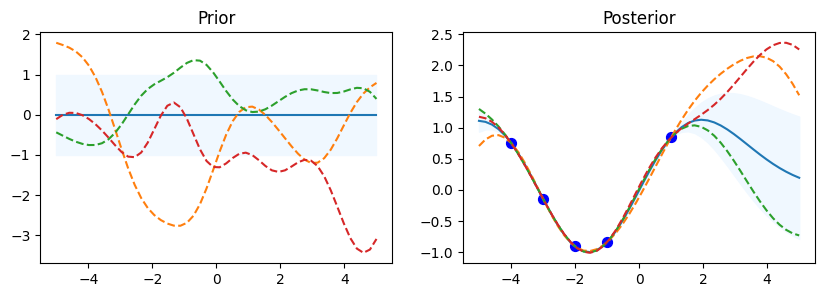

gp.kernel_: RBF(length_scale=1.93)
gp.log_marginal_likelihood: -3.4449378334621152
-------------------------------------------------- 




d:\Users\fengchonghui\Documents\chong hui\centralesupelec\Rozanoff\rozanoff_2025\rozanoff_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


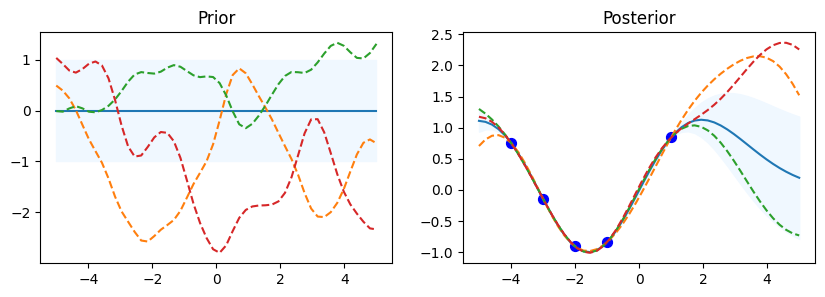

gp.kernel_: RationalQuadratic(alpha=1e+05, length_scale=1.93)
gp.log_marginal_likelihood: -3.444971892267393
-------------------------------------------------- 




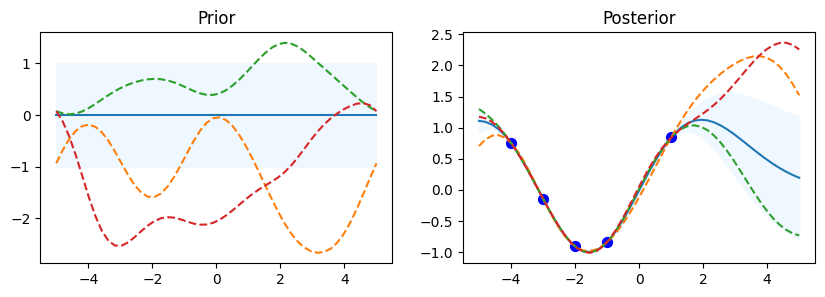

gp.kernel_: ExpSineSquared(length_scale=0.000524, periodicity=2.32e+04)
gp.log_marginal_likelihood: -3.444938144963266
-------------------------------------------------- 




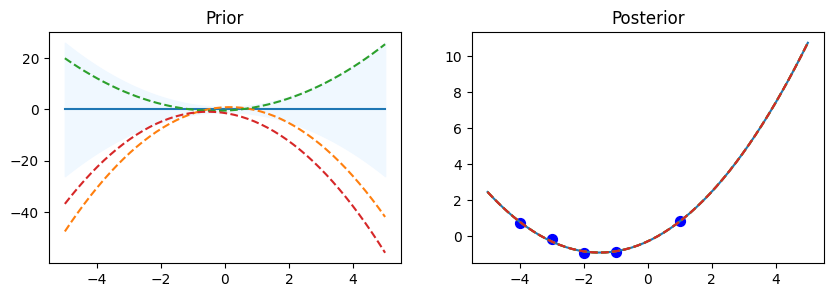

gp.kernel_: DotProduct(sigma_0=1) ** 2
gp.log_marginal_likelihood: -150226375.36896336
-------------------------------------------------- 




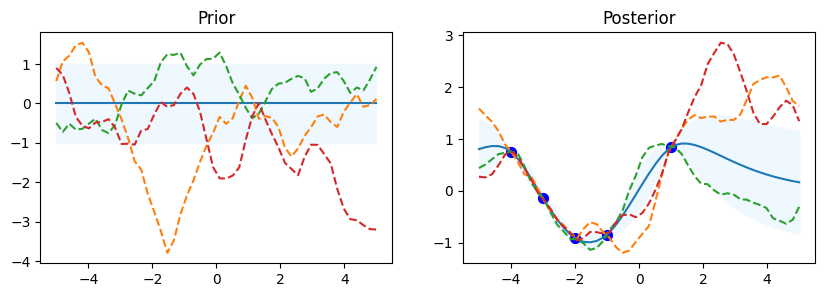

gp.kernel_: Matern(length_scale=1.99, nu=1.5)
gp.log_marginal_likelihood: -5.131637070524745
-------------------------------------------------- 




In [6]:
np.random.seed(0)
n = 50  # number of test sites

kernel_ = [
    kernels.RBF(),
    kernels.RationalQuadratic(),
    kernels.ExpSineSquared(periodicity=10.0),
    kernels.DotProduct(sigma_0=1.0) ** 2,
    kernels.Matern(),
]
print(kernel_, "\n")

for kernel in kernel_:

    # Gaussian process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Prior
    x_test = np.linspace(-5, 5, n).reshape(-1, 1)
    mu_prior, sd_prior = gp.predict(x_test, return_std=True)
    samples_prior = gp.sample_y(x_test, 3)

    # plot
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 2, 1)
    plt.plot(x_test, mu_prior)
    plt.fill_between(x_test.ravel(), mu_prior - sd_prior,
                     mu_prior + sd_prior, color='aliceblue')
    plt.plot(x_test, samples_prior, '--')
    plt.title('Prior')

    # Fit
    x_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
    y_train = np.sin(x_train)
    gp.fit(x_train, y_train)

    # Posterior
    mu_post, sd_post = gp.predict(x_test, return_std=True)
    mu_post = mu_post.reshape(-1)
    samples_post = np.squeeze(gp.sample_y(x_test, 3))

    # plot
    plt.subplot(1, 2, 2)
    plt.plot(x_test, mu_post)
    plt.fill_between(x_test.ravel(), mu_post - sd_post,
                     mu_post + sd_post, color='aliceblue')
    plt.plot(x_test, samples_post, '--')
    plt.scatter(x_train, y_train, c='blue', s=50)
    plt.title('Posterior')

    plt.show()

    print("gp.kernel_:", gp.kernel_)
    print("gp.log_marginal_likelihood:", gp.log_marginal_likelihood(gp.kernel_.theta))

    print('-'*50, '\n\n')